In [18]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from skimpy import skim
import statsmodels.api as sm

In [25]:
df=pd.read_csv('../datasets/d5.csv')
df.shape

(1460, 2)

In [20]:
print(df.describe)

<bound method NDFrame.describe of             Date  Energy Consumption
0     2020-01-01          305.311409
1     2020-01-02          299.374329
2     2020-01-03          307.646359
3     2020-01-04          316.811967
4     2020-01-05          299.651923
...          ...                 ...
1455  2023-12-26          380.398916
1456  2023-12-27          405.951747
1457  2023-12-28          402.642110
1458  2023-12-29          412.140555
1459  2023-12-30          406.387546

[1460 rows x 2 columns]>


         Date  Energy Consumption
0  2020-01-01          305.311409
1  2020-01-02          299.374329
2  2020-01-03          307.646359
3  2020-01-04          306.780983
4  2020-01-05          307.579311


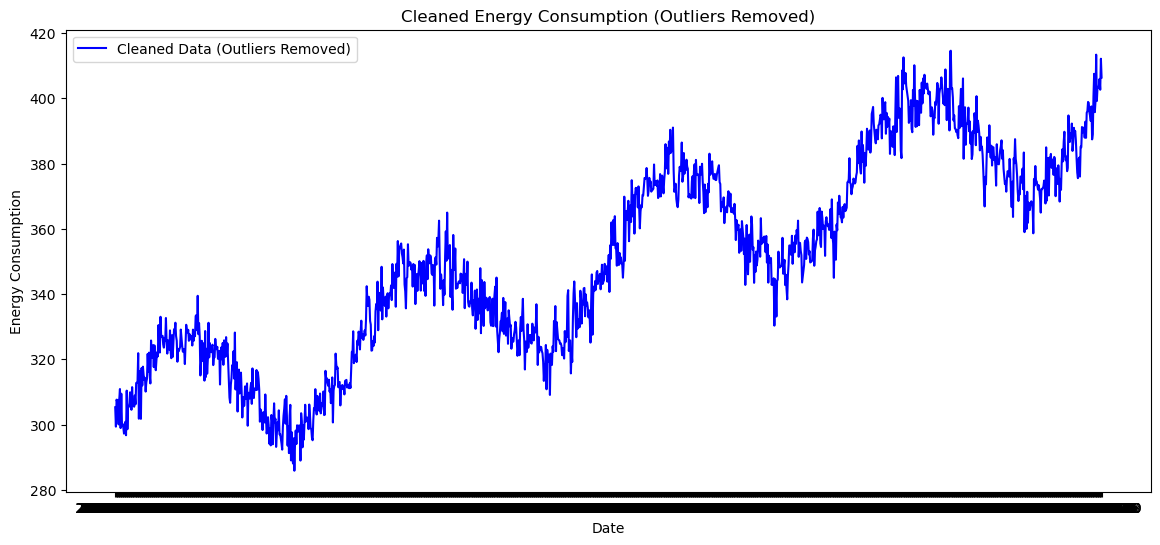

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def zscore(s, window, thresh=1, return_all=False):
    roll = s.rolling(window=window, min_periods=1, center=True)
    avg = roll.mean()
    std = roll.std(ddof=0)
    z = s.sub(avg).div(std)
    m = z.between(-thresh, thresh)
    
    if return_all:
        return z, avg, std, m
    return s.where(m, avg)

df['Cleaned Energy Consumption'] = zscore(df['Energy Consumption'], window=7)
df = df[['Date', 'Cleaned Energy Consumption']]
df.rename(columns={'Cleaned Energy Consumption': 'Energy Consumption'}, inplace=True)

print(df.head())

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Energy Consumption'], label='Cleaned Data (Outliers Removed)', color='blue')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Cleaned Energy Consumption (Outliers Removed)')
plt.legend()
plt.show()


In [27]:
df

,Date,Energy Consumption
0,2020-01-01,305.311409
1,2020-01-02,299.374329
2,2020-01-03,307.646359
3,2020-01-04,306.780983
4,2020-01-05,307.579311
...,...,...
1455,2023-12-26,403.823899
1456,2023-12-27,405.951747
1457,2023-12-28,402.642110
1458,2023-12-29,412.140555
